In [50]:
%run -n main.py
%matplotlib inline

In [4]:
groups = load_groups_list()

In [5]:
slice = groups[(groups.quantity > 5000) & (groups.quantity < 10000)]

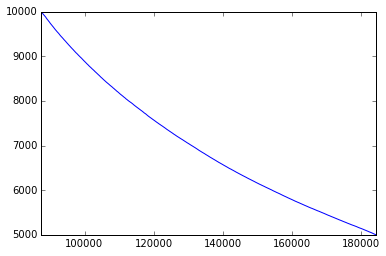

In [6]:
slice.quantity.plot()

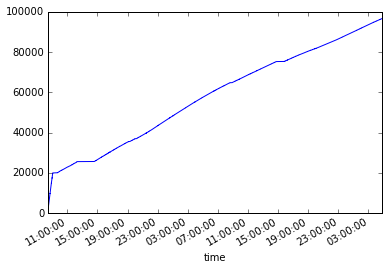

In [3]:
show_progress(get_members_download_progress())

In [9]:
write_table(
    serialize_groups_members(read_groups_members()),
    GROUPS_MEMBERS
)

In [11]:
sort_table(GROUPS_MEMBERS, by=USER_COLUMN)

Split in 20 chunks, prefix: tables/tmp/split
Sort 1/20: tables/tmp/splitaa
Sort 2/20: tables/tmp/splitab
Sort 3/20: tables/tmp/splitac
Sort 4/20: tables/tmp/splitad
Sort 5/20: tables/tmp/splitae
Sort 6/20: tables/tmp/splitaf
Sort 7/20: tables/tmp/splitag
Sort 8/20: tables/tmp/splitah
Sort 9/20: tables/tmp/splitai
Sort 10/20: tables/tmp/splitaj
Sort 11/20: tables/tmp/splitak
Sort 12/20: tables/tmp/splital
Sort 13/20: tables/tmp/splitam
Sort 14/20: tables/tmp/splitan
Sort 15/20: tables/tmp/splitao
Sort 16/20: tables/tmp/splitap
Sort 17/20: tables/tmp/splitaq
Sort 18/20: tables/tmp/splitar
Sort 19/20: tables/tmp/splitas
Sort 20/20: tables/tmp/splitat
Sort 21/20: tables/tmp/splitau
Merge into tables/groups_members.tsv


In [12]:
group_members_size = get_table_size(GROUPS_MEMBERS)

In [72]:
records = log_progress(read_table(GROUPS_MEMBERS), total=group_members_size)
groups = group_stream(records, by=USER_COLUMN)
histogram = Counter(count for user, count in reduce_user_groups(groups))

 0.00% 0.50% 1.00% 1.50% 2.00% 2.50% 3.00% 3.50% 4.00% 4.50% 5.00% 5.50% 6.00% 6.50% 7.00% 7.50% 8.00% 8.50% 9.00% 9.50% 10.00% 10.50% 11.00% 11.50% 12.00% 12.50% 13.00% 13.50% 14.00% 14.50% 15.00% 15.50% 16.00% 16.50% 17.00% 17.50% 18.00% 18.50% 19.00% 19.50% 20.00% 20.50% 21.00% 21.50% 22.00% 22.50% 23.00% 23.50% 24.00% 24.50% 25.00% 25.50% 26.00% 26.50% 27.00% 27.50% 28.00% 28.50% 29.00% 29.50% 30.00% 30.50% 31.00% 31.50% 32.00% 32.50% 33.00% 33.50% 34.00% 34.50% 35.00% 35.50% 36.00% 36.50% 37.00% 37.50% 38.00% 38.50% 39.00% 39.50% 40.00% 40.50% 41.00% 41.50% 42.00% 42.50% 43.00% 43.50% 44.00% 44.50% 45.00% 45.50% 46.00% 46.50% 47.00% 47.50% 48.00% 48.50% 49.00% 49.50% 50.00% 50.50% 51.00% 51.50% 52.00% 52.50% 53.00% 53.50% 54.00% 54.50% 55.00% 55.50% 56.00% 56.50% 57.00% 57.50% 58.00% 58.50% 59.00% 59.50% 60.00% 60.50% 61.00% 61.50% 62.00% 62.50% 63.00% 63.50% 64.00% 64.50% 65.00% 65.50% 66.00% 66.50% 67.00% 67.50% 68.00% 68.50% 69.00% 69.50% 70.00% 70.50% 71.00% 71.50% 72.00% 72.5

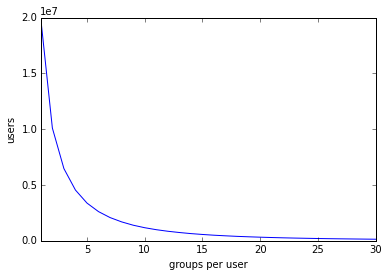

In [86]:
table = pd.Series(histogram)
ax = table[:30].plot()
ax.set_xlabel('groups per user')
ax.set_ylabel('users')

In [21]:
combinations = 0
for count, users in histogram.iteritems():
    if count < 15:
        combinations += users * count * (count - 1) / 2
combinations

551911759

In [23]:
records = log_progress(read_table(GROUPS_MEMBERS), total=group_members_size)
groups = group_stream(records, by=USER_COLUMN)
combinations = reduce_combinations(groups, cap=15)
write_table(serialize_combinations(combinations), COMBINATIONS)

 0.00% 0.50% 1.00% 1.50% 2.00% 2.50% 3.00% 3.50% 4.00% 4.50% 5.00% 5.50% 6.00% 6.50% 7.00% 7.50% 8.00% 8.50% 9.00% 9.50% 10.00% 10.50% 11.00% 11.50% 12.00% 12.50% 13.00% 13.50% 14.00% 14.50% 15.00% 15.50% 16.00% 16.50% 17.00% 17.50% 18.00% 18.50% 19.00% 19.50% 20.00% 20.50% 21.00% 21.50% 22.00% 22.50% 23.00% 23.50% 24.00% 24.50% 25.00% 25.50% 26.00% 26.50% 27.00% 27.50% 28.00% 28.50% 29.00% 29.50% 30.00% 30.50% 31.00% 31.50% 32.00% 32.50% 33.00% 33.50% 34.00% 34.50% 35.00% 35.50% 36.00% 36.50% 37.00% 37.50% 38.00% 38.50% 39.00% 39.50% 40.00% 40.50% 41.00% 41.50% 42.00% 42.50% 43.00% 43.50% 44.00% 44.50% 45.00% 45.50% 46.00% 46.50% 47.00% 47.50% 48.00% 48.50% 49.00% 49.50% 50.00% 50.50% 51.00% 51.50% 52.00% 52.50% 53.00% 53.50% 54.00% 54.50% 55.00% 55.50% 56.00% 56.50% 57.00% 57.50% 58.00% 58.50% 59.00% 59.50% 60.00% 60.50% 61.00% 61.50% 62.00% 62.50% 63.00% 63.50% 64.00% 64.50% 65.00% 65.50% 66.00% 66.50% 67.00% 67.50% 68.00% 68.50% 69.00% 69.50% 70.00% 70.50% 71.00% 71.50% 72.00% 72.5

In [26]:
sort_table(COMBINATIONS, by=(SOURCE, TARGET), chunks=50)

Split in 50 chunks, prefix: tables/tmp/split
Sort 1/50: tables/tmp/splitaa
Sort 2/50: tables/tmp/splitab
Sort 3/50: tables/tmp/splitac
Sort 4/50: tables/tmp/splitad
Sort 5/50: tables/tmp/splitae
Sort 6/50: tables/tmp/splitaf
Sort 7/50: tables/tmp/splitag
Sort 8/50: tables/tmp/splitah
Sort 9/50: tables/tmp/splitai
Sort 10/50: tables/tmp/splitaj
Sort 11/50: tables/tmp/splitak
Sort 12/50: tables/tmp/splital
Sort 13/50: tables/tmp/splitam
Sort 14/50: tables/tmp/splitan
Sort 15/50: tables/tmp/splitao
Sort 16/50: tables/tmp/splitap
Sort 17/50: tables/tmp/splitaq
Sort 18/50: tables/tmp/splitar
Sort 19/50: tables/tmp/splitas
Sort 20/50: tables/tmp/splitat
Sort 21/50: tables/tmp/splitau
Sort 22/50: tables/tmp/splitav
Sort 23/50: tables/tmp/splitaw
Sort 24/50: tables/tmp/splitax
Sort 25/50: tables/tmp/splitay
Sort 26/50: tables/tmp/splitaz
Sort 27/50: tables/tmp/splitba
Sort 28/50: tables/tmp/splitbb
Sort 29/50: tables/tmp/splitbc
Sort 30/50: tables/tmp/splitbd
Sort 31/50: tables/tmp/splitbe
Sor

In [29]:
records = log_progress(read_groups_members(), total=group_members_size)
groups = group_stream(records, by=GROUP_COLUMN)
sizes = dict(reduce_groups_sizes(groups))

0.00% 0.50% 1.00% 1.50% 2.00% 2.50% 3.00% 3.50% 4.00% 4.50% 5.00% 5.50% 6.00% 6.50% 7.00% 7.50% 8.00% 8.50% 9.00% 9.50% 10.00% 10.50% 11.00% 11.50% 12.00% 12.50% 13.00% 13.50% 14.00% 14.50% 15.00% 15.50% 16.00% 16.50% 17.00% 17.50% 18.00% 18.50% 19.00% 19.50% 20.00% 20.50% 21.00% 21.50% 22.00% 22.50% 23.00% 23.50% 24.00% 24.50% 25.00% 25.50% 26.00% 26.50% 27.00% 27.50% 28.00% 28.50% 29.00% 29.50% 30.00% 30.50% 31.00% 31.50% 32.00% 32.50% 33.00% 33.50% 34.00% 34.50% 35.00% 35.50% 36.00% 36.50% 37.00% 37.50% 38.00% 38.50% 39.00% 39.50% 40.00% 40.50% 41.00% 41.50% 42.00% 42.50% 43.00% 43.50% 44.00% 44.50% 45.00% 45.50% 46.00% 46.50% 47.00% 47.50% 48.00% 48.50% 49.00% 49.50% 50.00% 50.50% 51.00% 51.50% 52.00% 52.50% 53.00% 53.50% 54.00% 54.50% 55.00% 55.50% 56.00% 56.50% 57.00% 57.50% 58.00% 58.50% 59.00% 59.50% 60.00% 60.50% 61.00% 61.50% 62.00% 62.50% 63.00% 63.50% 64.00% 64.50% 65.00% 65.50% 66.00% 66.50% 67.00% 67.50% 68.00% 68.50% 69.00% 69.50% 70.00% 70.50% 71.00% 71.50% 72.00% 72.50

In [30]:
combinations_size = get_table_size(COMBINATIONS)

In [33]:
records = deserialize_combinations(log_progress(read_table(COMBINATIONS), total=combinations_size))
groups = group_stream(records, by=(SOURCE, TARGET))
edges = reduce_edges(groups, sizes)
histogram = Counter(round(weight, 5) for _, _, weight in edges)

 0.00% 0.50% 1.00% 1.50% 2.00% 2.50% 3.00% 3.50% 4.00% 4.50% 5.00% 5.50% 6.00% 6.50% 7.00% 7.50% 8.00% 8.50% 9.00% 9.50% 10.00% 10.50% 11.00% 11.50% 12.00% 12.50% 13.00% 13.50% 14.00% 14.50% 15.00% 15.50% 16.00% 16.50% 17.00% 17.50% 18.00% 18.50% 19.00% 19.50% 20.00% 20.50% 21.00% 21.50% 22.00% 22.50% 23.00% 23.50% 24.00% 24.50% 25.00% 25.50% 26.00% 26.50% 27.00% 27.50% 28.00% 28.50% 29.00% 29.50% 30.00% 30.50% 31.00% 31.50% 32.00% 32.50% 33.00% 33.50% 34.00% 34.50% 35.00% 35.50% 36.00% 36.50% 37.00% 37.50% 38.00% 38.50% 39.00% 39.50% 40.00% 40.50% 41.00% 41.50% 42.00% 42.50% 43.00% 43.50% 44.00% 44.50% 45.00% 45.50% 46.00% 46.50% 47.00% 47.50% 48.00% 48.50% 49.00% 49.50% 50.00% 50.50% 51.00% 51.50% 52.00% 52.50% 53.00% 53.50% 54.00% 54.50% 55.00% 55.50% 56.00% 56.50% 57.00% 57.50% 58.00% 58.50% 59.00% 59.50% 60.00% 60.50% 61.00% 61.50% 62.00% 62.50% 63.00% 63.50% 64.00% 64.50% 65.00% 65.50% 66.00% 66.50% 67.00% 67.50% 68.00% 68.50% 69.00% 69.50% 70.00% 70.50% 71.00% 71.50% 72.00% 72.5

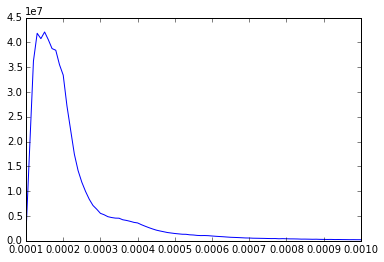

In [34]:
table = pd.Series(histogram)
table[:0.001].plot()

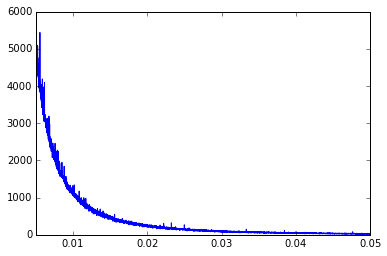

In [40]:
table[0.005:0.05].plot()

In [48]:
records = deserialize_combinations(log_progress(read_table(COMBINATIONS), total=combinations_size))
groups = group_stream(records, by=(SOURCE, TARGET))
edges = reduce_edges(groups, sizes)
heavy = [(source, target, weight) for source, target, weight in edges if weight > 0.005]

 0.00% 0.50% 1.00% 1.50% 2.00% 2.50% 3.00% 3.50% 4.00% 4.50% 5.00% 5.50% 6.00% 6.50% 7.00% 7.50% 8.00% 8.50% 9.00% 9.50% 10.00% 10.50% 11.00% 11.50% 12.00% 12.50% 13.00% 13.50% 14.00% 14.50% 15.00% 15.50% 16.00% 16.50% 17.00% 17.50% 18.00% 18.50% 19.00% 19.50% 20.00% 20.50% 21.00% 21.50% 22.00% 22.50% 23.00% 23.50% 24.00% 24.50% 25.00% 25.50% 26.00% 26.50% 27.00% 27.50% 28.00% 28.50% 29.00% 29.50% 30.00% 30.50% 31.00% 31.50% 32.00% 32.50% 33.00% 33.50% 34.00% 34.50% 35.00% 35.50% 36.00% 36.50% 37.00% 37.50% 38.00% 38.50% 39.00% 39.50% 40.00% 40.50% 41.00% 41.50% 42.00% 42.50% 43.00% 43.50% 44.00% 44.50% 45.00% 45.50% 46.00% 46.50% 47.00% 47.50% 48.00% 48.50% 49.00% 49.50% 50.00% 50.50% 51.00% 51.50% 52.00% 52.50% 53.00% 53.50% 54.00% 54.50% 55.00% 55.50% 56.00% 56.50% 57.00% 57.50% 58.00% 58.50% 59.00% 59.50% 60.00% 60.50% 61.00% 61.50% 62.00% 62.50% 63.00% 63.50% 64.00% 64.50% 65.00% 65.50% 66.00% 66.50% 67.00% 67.50% 68.00% 68.50% 69.00% 69.50% 70.00% 70.50% 71.00% 71.50% 72.00% 72.5

In [45]:
names = dict(zip(slice.vk_id, slice.caption))

In [55]:
save_graph(build_graph(heavy, sizes, names))

In [69]:
save_data(build_data(heavy, sizes, names, top=1000))

In [101]:
show_related(37664558, heavy, names, html=False)

"Мадам Вязалкина" Пряжа (товары для рукоделия)	https://vk.com/club37664558
2.49%	Пряжа	https://vk.com/club5084903
2.37%	Корпорация "ПРЯЖА"	https://vk.com/club75577569
1.42%	Магазинчик пряжи Eesti lõng (Kauni, Кауни)	https://vk.com/club58678379
1.39%	Пряжа Кауни (Kauni)  - легенда Эстонии. Вязание.	https://vk.com/club57231027
1.32%	ПРЯЖА ДЁШЕВО.ФЛИС.РЕЗИНКИ ДЛЯ ПЛЕТЕНИЯ БРАСЛЕТОВ	https://vk.com/club53371463
1.26%	Магазин пряжи и товаров для рукоделия КУДЕЛЬ	https://vk.com/club38116251
1.24%	Вязаные головные уборы и не только.	https://vk.com/club12443394
1.21%	HOBBY & HOME | РУКОДЕЛИЕ	https://vk.com/club60959851
1.18%	Интернет-Магазин Пряжи "АЖУР"	https://vk.com/club40561560
1.15%	Пряжа Spagetti Спагетти	https://vk.com/club59200218
